<a href="https://colab.research.google.com/github/danny1707/COVID_PROJECT/blob/main/covid_test_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#REQUIEREMENTS

In [ ]:
 pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.6/dist-packages (0.4.2)


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import pandas as pd
#from skfuzzy import control as ctrl

#FUZZY LOGIC

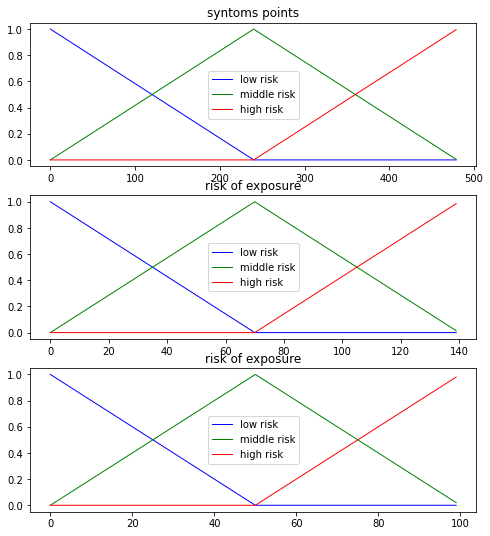

In [ ]:
# Generate universe variables
#   * risk to have symptoms [0, 10]
#   * likelihood of needing the test [0, 100] in units of porcentage points
x_syntoms       = np.arange(0, 480, 1)
x_risk_exposure = np.arange(0, 140, 1)
x_test          = np.arange(0, 100, 1)


#generatin fuzzy membership functions

#we need two membresy functios
# *syntoms
syntoms_lo = fuzz.trimf(x_syntoms, [0, 0, 240])
syntoms_md = fuzz.trimf(x_syntoms, [0, 240, 480])
syntoms_hi = fuzz.trimf(x_syntoms, [240, 480, 480])

# *risk of exposure
exposure_lo = fuzz.trimf(x_risk_exposure, [0, 0, 70])
exposure_md = fuzz.trimf(x_risk_exposure, [0, 70, 140])
exposure_hi = fuzz.trimf(x_risk_exposure, [70, 140, 140])

risk_lo = fuzz.trimf(x_test, [0, 0, 50])
risk_md = fuzz.trimf(x_test, [0, 50, 100])
risk_hi = fuzz.trimf(x_test, [50, 100, 100])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_syntoms, syntoms_lo, 'b', linewidth=1, label='low risk')
ax0.plot(x_syntoms, syntoms_md, 'g', linewidth=1, label='middle risk')
ax0.plot(x_syntoms, syntoms_hi, 'r', linewidth=1, label='high risk')
ax0.set_title('syntoms points')
ax0.legend()


ax1.plot(x_risk_exposure, exposure_lo, 'b', linewidth=1, label='low risk')
ax1.plot(x_risk_exposure, exposure_md, 'g', linewidth=1, label='middle risk')
ax1.plot(x_risk_exposure, exposure_hi, 'r', linewidth=1, label='high risk')
ax1.set_title('risk of exposure')
ax1.legend()

ax2.plot(x_test, risk_lo, 'b', linewidth=1, label='low risk')
ax2.plot(x_test, risk_md, 'g', linewidth=1, label='middle risk')
ax2.plot(x_test, risk_hi, 'r', linewidth=1, label='high risk')
ax2.set_title('risk of exposure')
ax2.legend()

#INPUT DATA

In [ ]:
#FUNCTIONS

#Read data
def data_read(file):
  df = pd.read_csv(file, sep=',')
  #df = pd.read_csv(file, header=None)
  df = pd.read_csv(file, header=None, skiprows=1)
  return df

#convert data csv to array
def convert_array(file):
  data = np.array(data_read(file))
  data = np.delete(data, (0,1), axis = 1)
  return data

# convert data with loaded points set
def data_range(data):
  data_convert = []
  for i in range(0,5):
    data_convert = np.append(data_convert, data[i] * 5)
  for i in range(5,7):
    data_convert = np.append(data_convert, data[i] * 3)
  for i in range(7,13):
    data_convert = np.append(data_convert, data[i])
  return data_convert

#sum data in the array
def sum_data(array):
  return np.sum(array)

##################
# convert data YES/NO in numeric values
def binary_risk(array):
  if array == 'yes' or array == 'YES':
    return 10
  else:
    return 0
# executes the function YES/NO n times, depending of the array
def map_risk(data):
  return list(map(binary_risk, data))

def binary_data_range(data):
  data_convert = []
  for i in range(0,1):
    data_convert = np.append(data_convert, data[i] * 5)
  for i in range(1,2):
    data_convert = np.append(data_convert, data[i] * 3)
  for i in range(2,5):
    data_convert = np.append(data_convert, data[i])
  return data_convert

##################
# convert data with loaded points set
def data_risk(data):
  data_convert = []
  for i in range(0,2):
    data_convert = np.append(data_convert, data[i] * 5)
  for i in range(2,3):
    data_convert = np.append(data_convert, data[i] * 3)
  for i in range(3,4):
    data_convert = np.append(data_convert, data[i])
  return data_convert


In [ ]:
#data1
file = 'person1_range_data.csv'
result_range = convert_array(file)
print(result_range)
result_range = data_range(result_range)
print(result_range)
sum_data_range = sum_data(result_range)
print(sum_data_range)

#data2
file = 'person1_range_binary_data.csv' 
result_binary_range = convert_array(file)
print(result_binary_range)
result_binary_range = map_risk(result_binary_range)
print(result_binary_range)


result_binary_range = binary_data_range(result_binary_range)
print(result_binary_range)
sum_binary_data_range = sum_data(result_binary_range)
print(sum_binary_data_range)


[[10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]]
[50 50 50 50 50 30 30 10 10 10 10 10 10]
370
[['yes']
 ['yes']
 ['yes']
 ['yes']
 ['yes']]
[10, 10, 10, 10, 10]
[50. 30. 10. 10. 10.]
110.0


In [ ]:
#data3
file = 'person1_binary_data.csv'
data = convert_array(file)
result = map_risk(data)
#result = sum_data(result)
result = data_risk(result)
result_binary = sum_data(result)
print(result_binary)

140.0


In [ ]:
total_syntoms = sum_data_range + sum_binary_data_range
total_syntoms

480.0

#FUZZY RULES

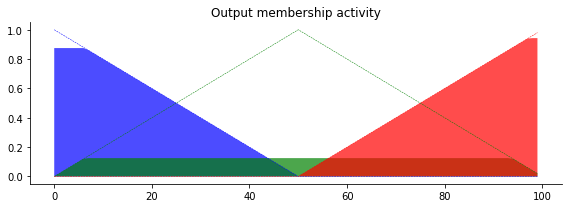

In [ ]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values from the data files

total_syntoms = 30
result_binary = 136

# total_syntoms
syntoms_level_lo = fuzz.interp_membership(x_syntoms, syntoms_lo, total_syntoms)
syntoms_level_md = fuzz.interp_membership(x_syntoms, syntoms_md, total_syntoms)
syntoms_level_hi = fuzz.interp_membership(x_syntoms, syntoms_hi, total_syntoms)
# result_binary 
exposure_level_lo = fuzz.interp_membership(x_risk_exposure, exposure_lo, result_binary)
exposure_level_md = fuzz.interp_membership(x_risk_exposure, exposure_md, result_binary)
exposure_level_hi = fuzz.interp_membership(x_risk_exposure, exposure_hi, result_binary)

# Now we take our rules and apply them. Rule 1 with the syntoms OR the risk.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(syntoms_level_lo, exposure_level_lo)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
risk_activation_lo = np.fmin(active_rule1, risk_lo)  # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
risk_activation_md = np.fmin(syntoms_level_md, risk_md)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(syntoms_level_hi, exposure_level_hi)
risk_activation_hi = np.fmin(active_rule3, risk_hi)
risk0 = np.zeros_like(x_test)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_test, risk0, risk_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_test, risk_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_test, risk0, risk_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_test, risk_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_test, risk0, risk_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_test, risk_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

[0.875      0.875      0.875      0.875      0.875      0.875
 0.875      0.86       0.84       0.82       0.8        0.78
 0.76       0.74       0.72       0.7        0.68       0.66
 0.64       0.62       0.6        0.58       0.56       0.54
 0.52       0.5        0.48       0.46       0.44       0.42
 0.4        0.38       0.36       0.34       0.32       0.3
 0.28       0.26       0.24       0.22       0.2        0.18
 0.16       0.14       0.125      0.125      0.125      0.125
 0.125      0.125      0.125      0.125      0.125      0.125
 0.125      0.125      0.125      0.14       0.16       0.18
 0.2        0.22       0.24       0.26       0.28       0.3
 0.32       0.34       0.36       0.38       0.4        0.42
 0.44       0.46       0.48       0.5        0.52       0.54
 0.56       0.58       0.6        0.62       0.64       0.66
 0.68       0.7        0.72       0.74       0.76       0.78
 0.8        0.82       0.84       0.86       0.88       0.9
 0.92       0.94       0

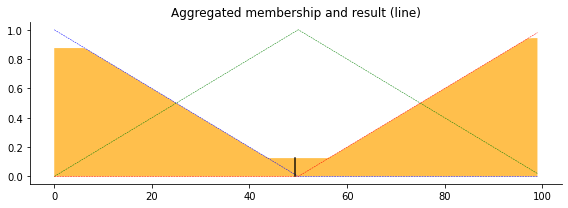

In [ ]:
# Aggregate all three output membership functions together
aggregated = np.fmax(risk_activation_lo,
                     np.fmax(risk_activation_md, risk_activation_hi))
print(aggregated)
# Calculate defuzzified result
risk = fuzz.defuzz(x_test , aggregated, 'centroid')
risk_activation = fuzz.interp_membership(x_test , aggregated, risk)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_test , risk_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_test , risk_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_test , risk_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_test , risk0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([risk, risk], [0, risk_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

print(risk)